## Sales Analysis



##### Import necessary libraries

In [4]:
import pandas as pd
import os

In [308]:
df=pd.read_csv('C:/Users/ELCOT/pythoncode/project/sales_data/Sales_April_2019.csv')
files=[file for file in os.listdir('C:/Users/ELCOT/pythoncode/project/sales_data')]
all_month_data=pd.DataFrame()
for file in files:
   df=pd.read_csv('C:/Users/ELCOT/pythoncode/project/sales_data/'+file)
   all_month_data=pd.concat([all_month_data,df])
all_month_data.to_csv('all_data.csv',index=False)    

##### Updated dataframe

In [312]:
df=pd.read_csv('all_data.csv')
df=df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Cleaning the Dataset

###### Drop NAN Rows

In [10]:
nan_df=df[df.isna().any(axis=1)]
display(nan_df.head())
df=df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
df=df[df['Order Date'].str[0:2]!='Or']

##### Change the Datatype

In [13]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

##### Add Month Column

In [15]:
df['Month']=df['Order Date'].str[0:2].astype('int')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add Sales Column 

In [17]:
df['sales']=df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add City Column

In [19]:
df['City']=df['Purchase Address'].str.split(',').str.get(1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


##### Creating New Dataframes for Visualization

In [203]:
df_g=df[['Quantity Ordered','Price Each','sales','Month']]

## Data Exploration!

##### What was the best month for sales? how much was earned that month?

In [205]:
df_g=df_g.groupby('Month').sum().reset_index()
df_g

,Month,Quantity Ordered,Price Each,sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


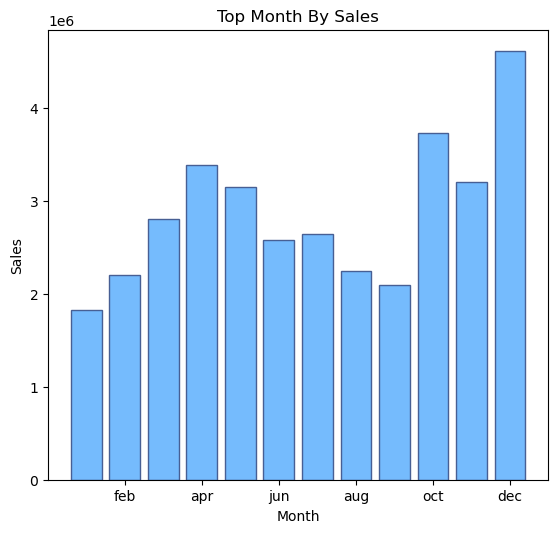

In [207]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
ax1=fig.add_axes([0,0,1,0.9])
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales')
ax1.set_title('Top Month By Sales')
ax1.bar(df_g['Month'],df_g['sales'],color=['#75bbfd'],edgecolor='#475f94')
plt.xticks([2,4,6,8,10,12],['feb','apr','jun','aug','oct','dec'])
plt.show()

##### Which city sold the most product?

In [95]:
df_g=df[['City','sales']]

In [97]:
df_g=df_g.groupby('City').sum().reset_index()
df_g=df_g.sort_values('sales')
df_g

,City,sales
1,Austin,1819581.75
6,Portland,2320490.61
8,Seattle,2747755.48
3,Dallas,2767975.40
0,Atlanta,2795498.58
2,Boston,3661642.01
5,New York City,4664317.43
4,Los Angeles,5452570.80
7,San Francisco,8262203.91


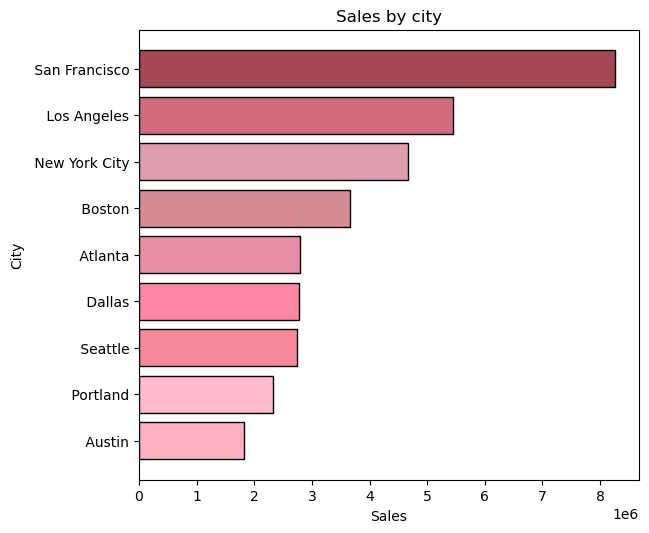

In [109]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
ax1=fig.add_axes([0,0,1,0.9])
ax1.set_xlabel('Sales')
ax1.set_ylabel('City')
ax1.set_title('Sales')
ax1.set_title('Sales by city')
ax1.barh(y=df_g['City'],width=df_g['sales'],color=['#fdb0c0','#ffbacd','#f7879a','#fe86a4','#e78ea5','#d58a94','#de9dac','#d46a7e','#a24857'],edgecolor='black')
plt.show()

##### What time should we display advertisements to maximize likehood of customer's buying product?

In [222]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hour']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [224]:
df_g=df.groupby('Hour').count().reset_index()

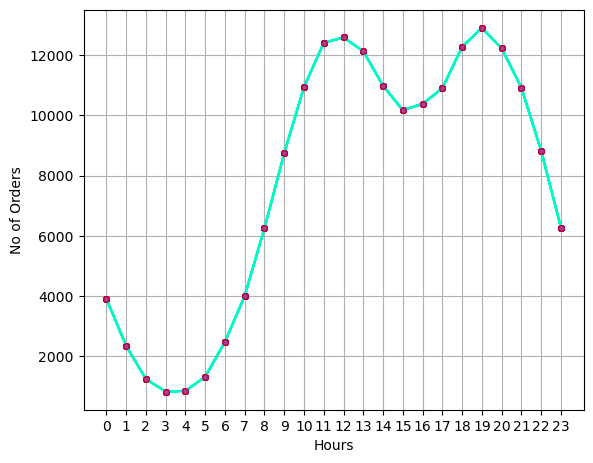

In [226]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
ax1=fig.add_axes([0,0,1,0.8])
ax1.set_xlabel('Hours')
ax1.set_ylabel('No of Orders')
plt.xticks(df_g['Hour'])
ax1.plot(df_g['Hour'],df.groupby('Hour').count(),color='#01f9c6',marker='o',ms=4,mfc='#a442a0',mec='#be013c')
plt.grid()
plt.show()


##### What product sold most often together?

In [35]:
df_g=df[df['Order ID'].duplicated(keep=False)]
df_g=df_g[['Order ID','Product','Quantity Ordered','sales']]
df_g.groupby('Order ID')['Product'].apply(list).value_counts()

Product
[iPhone, Lightning Charging Cable]                                                  882
[Google Phone, USB-C Charging Cable]                                                856
[iPhone, Wired Headphones]                                                          361
[Vareebadd Phone, USB-C Charging Cable]                                             312
[Google Phone, Wired Headphones]                                                    303
                                                                                   ... 
[Google Phone, USB-C Charging Cable, USB-C Charging Cable]                            1
[ThinkPad Laptop, 27in 4K Gaming Monitor]                                             1
[iPhone, Google Phone]                                                                1
[Vareebadd Phone, 27in FHD Monitor]                                                   1
[Google Phone, USB-C Charging Cable, Wired Headphones, Apple Airpods Headphones]      1
Name: count, Length: 366

##### What product sold the most?why do you think it sold most?

In [163]:
df_g=df[['Product','sales','Quantity Ordered','Price Each']]
df_g=df_g.groupby('Product').sum().reset_index()
df_g.head()

,Product,sales,Quantity Ordered,Price Each
0,20in Monitor,454148.71,4129,451068.99
1,27in 4K Gaming Monitor,2435097.56,6244,2429637.70
2,27in FHD Monitor,1132424.50,7550,1125974.93
3,34in Ultrawide Monitor,2355558.01,6199,2348718.19
4,AA Batteries (4-pack),106118.40,27635,79015.68


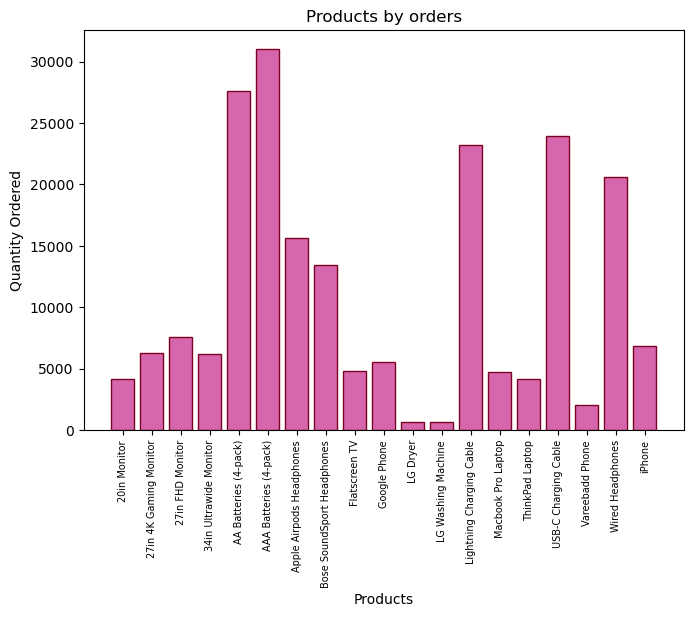

In [183]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
ax1=fig.add_axes([0,0,1.2,0.8])
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax1.set_title('Products by orders')
plt.xticks(rotation='vertical',size=7)
ax1.bar(df_g['Product'],df_g['Quantity Ordered'],color='#d767ad',edgecolor='#7b0323')
plt.show()

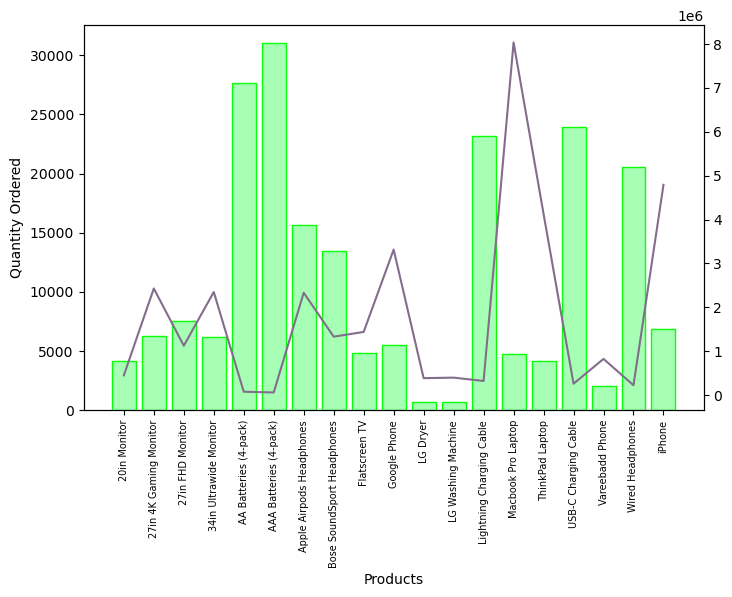

In [175]:
import matplotlib.pyplot as plt

fig,ax1=plt.subplots(figsize=(8,5))

ax2=ax1.twinx()
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax1.bar(df_g['Product'],df_g['Quantity Ordered'],color='#a7ffb5',edgecolor='#08ff08')
ax2.plot(df_g['Product'],df_g['Price Each'],color='#826d8c')
ax1.set_xticklabels(df_g['Product'],rotation='vertical',size=7)
plt.show()


##### Top 3 product by sales

In [41]:
df_g=df[['Product','sales']]
df_g=df_g.groupby('Product').sum().reset_index()

In [42]:
data=df_g.nlargest(n=3,columns=['sales'])
data

,Product,sales
13,Macbook Pro Laptop,8037600.0
18,iPhone,4794300.0
14,ThinkPad Laptop,4129958.7


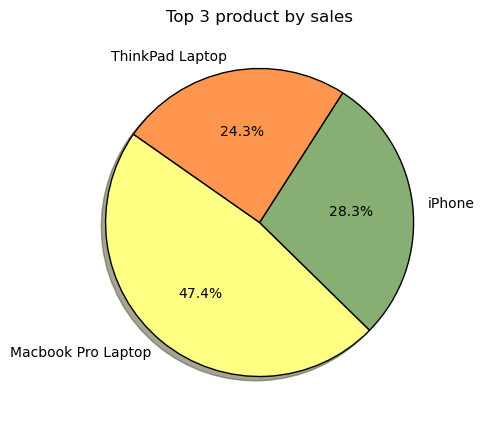

In [159]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
labels=data['Product']
plt.title('Top 3 product by sales')
plt.pie(data['sales'],labels=labels,autopct='%1.1f%%',shadow=True,colors=['#ffff84','#87ae73','#ff964f'],wedgeprops=dict(edgecolor='black'),startangle=145)
plt.show()

## Conclusion

##### December month  have the highest due to Christmas and holiday shopping. 
##### AAA batteries Mackbook pro laptop, Iphone,Thinkpad laptop top selling items 
##### Schedule ads during 12pm and 7pm time slots for maximum impact.
##### Iphone , Lighting charging cable are frequently sold together.
##### San Franciso is the top-performing city for sales.
